# <center>1. Первинний аналіз даних з Pandas</center>
## <center>1.1 Робота з даними в бібліотеці Pandas</center>

**[Pandas](http://pandas.pydata.org)** — це бібліотека Python, що надає широкі можливості для аналізу даних. З її допомогою дуже зручно завантажувати, обробляти і аналізувати табличні дані за допомогою SQL-подібних запитів. З звязці з бібліотеками `Matplotlib` та `Seaborn` з'являється можливість зручного візуального аналізу табличних даних.


In [ ]:
import numpy as np
import pandas as pd

**Дані**, з якими працюють аналітики, як правило, зберігаються у вигляді таблиць — наприклад, у форматах `.csv`, `.tsv` чи `.xlsx`. Щоб зчитати потрібні дані з такого файлу, добре підходить бібліотека Pandas.

Основними структурами даних в Pandas є класи `Series` і `DataFrame`. Перший з них є одномірним індексованим масивом даних деякого фіксованого типу. Другий - це двовимірна структура даних, тобто таблиця, кожний стовбець якої містить дані одного типу. Можна представити її як словник об'єктів типу `Series`. Структура `DataFrame` добре підходить для подання реальных даних: рядки відповідають ознаковим описам окремих об'єктів (спостережень), а стовбці відповідають ознакам.


In [ ]:
data_folder = "data" # шлях до файлу даних, якщо блокнот запускаємо на ПК

**Доступ до даних на google drive**, якщо ви відкриваєте блокнот в **google colab**, а не на PC, можна отримати шляхом монтування google drive






In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_1/data	

telecom_churn.csv


In [ ]:
data_folder = "gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_1/data" # шлях до папки з даними на моєму google drive

---------

## Демонстрація основних методів Pandas 


### Читання з файлу і первинний аналіз

Прочитаємо дані і подивимося на перші 5 рядків за допомогою метода `head`:

In [ ]:
df = pd.read_csv(data_folder+'/telecom_churn.csv')

In [ ]:
df.head(100)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


В Jupyter-блокнотах датафрейми `Pandas` виводятся у вигляді таких красивих таблиць, і `print(df.head())` виглядає гірше.

Доречі, за замовчуванням `Pandas` виводить всього 20 стовбців і 60 рядків, тому якщо ваш датафрейм більший, скористайтеся функцією `set_option`:

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Tакож можемо вказати значення параметра `presicion` рівним 2, щоб відображати два знаки після коми (а не 6, як встановлено за замовчуванням.

In [ ]:
pd.set_option('precision', 2)

**Поглянемо на розмір даних, назву ознак і їх типи**

In [ ]:
print(df.shape)

(3333, 20)


Бачимо, що в таблиці 3333 рядки і 20 стовбців. Виводимо назви стовбців:

In [ ]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Щоб подивитися загальну інформацію про датафрейм і всі ознаки, скористаємося методом **`info`**:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` и `object` — це типи ознак. Бачимо, що 1 ознака — логічна (`bool`), 3 ознаки мають тип `object` і 16 ознак — числові.

**Змінити тип колонки** можна за допомогою метода `astype`. Застосуємо цей метод до ознаки `Churn` і переведемо його в `int64`:

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

Метод **`describe`** показує основні статистичні характеристики даних за кожною числовою ознакою (тип `int64` і `float64`): число непропущених значень, середнє, стандартне відхилення, діапазон, медіану, 0.25 і 0.75 квартилі.

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Щоб подивитися статистику за нечисловими ознаками, потрібно явно вказати цікаві нам типи в параметрі `include`. Можна також задати `include`='all', щоб вивести статистику за всіма доступними знаками
.

In [ ]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категоріальних (тип `object`) і булевих (тип `bool`) ознак  можна скористатися методом **`value_counts`**. Подивимося на розподіл нашої цільової змінної — `Churn`:

In [ ]:
type(df['Churn'])

pandas.core.series.Series

In [ ]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 користувача з 3333 — лояльні, значення змінної `Churn` у них — `0`.

Подивимося на розподіл користувачів за змінною `Area code`. Вкажемо значення параметра `normalize=True`, щоб подивитися не абсолютні частоти, а відносні.

In [ ]:
df['Area code'].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

### Сортуання

`DataFrame` можна відсортувати за значенням якої-небудь з ознак. У нашому випадку, наприклад, за `Total day charge` (`ascending=False` для сортування за зменшенням):

In [ ]:
df.sort_values(by='Total day charge', ascending=False).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True
975,DE,129,510,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
1679,OK,82,510,No,No,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,True
2028,SD,93,510,No,No,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,True
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True


Сортувати можна і за групою стовбців:

In [ ]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,False
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,False
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,False


In [ ]:
df1 = pd.DataFrame(np.random.randint(1, 5, (10,2)), columns=['a','b'])
df1.sort_values(['a', 'b'], ascending=[True, False])

,a,b
0,1,4
9,1,2
1,2,4
7,2,4
4,2,2
6,4,3
8,4,3
2,4,2
5,4,2
3,4,1


### Індексація і отримання даних

`DataFrame` можна індексувати по-різному. У звязку з цим розглянемо різні способи індексації і отримання потрібних нам даних з датафрейму на прикладі простих питань.

Для отримання окремого стовбця можна використати конструкцію такого вигляду `DataFrame['Name']`. Скористаємося цим для відповіді на питання: **яка частка нелояльних користувачів у нашому датафреймі?**

In [ ]:
df['Churn'].mean()

0.14491449144914492

14,5% — доволі поганий показник для компанії, оскільки з таким процентом відтоку можна і збанкрутувати.

Дуже зручною є логічна індексація `DataFrame` за одним стовбцем. Виглядає вона наступним чином: `df[P(df['Name'])]`, де `P` -  деяка логічна умова, що перевіряється для кожного елементу стовбця `Name`. Результатом такої індексації є `DataFrame`, що містить лише рядки, які задовольняють умову `P` за стовбцем `Name`. 

Скористаємося цим для відповіді на питання: **які середні значення числових ознак серед нелояльних користувачів?**

In [ ]:
df[ df['State']=='NC'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            104.78
Area code                 433.38
Number vmail messages       9.09
Total day minutes         185.15
Total day calls           102.79
Total day charge           31.48
Total eve minutes         202.54
Total eve calls           103.94
Total eve charge           17.22
Total night minutes       197.14
Total night calls         100.50
Total night charge          8.87
Total intl minutes          9.96
Total intl calls            4.12
Total intl charge           2.69
Customer service calls      1.56
Churn                       0.16
dtype: float64

Скомбінувавши попередні два види індексації, дамо відповідь на питання: **скільки в середньому протягом дня розмовляють по телефону нелояльні користувачі**?

In [ ]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

**Яка максимальна тривалість міжнародних дзвінків серед лояльних користувачів (`Churn == 0`), що не користуються послугою міжнародного роумінгу (`'International plan' == 'No'`)?**

In [ ]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Датафрейми можна індексувати як за назвою стовбця чи рядка, так і за порядковим номером. Для індексації **за назвою** використовується метод **`loc`**, **за номером** — **`iloc`**.

В першому випадку ми говоримо  _«передай нам значення для id рядків від 0 до 5 і для стовбців від State до Area code»_, а в другому — _«передай нам значення перших п'яти рядків в перших трьох стовбцях»_. 

У випадку `iloc` зріз працює звичайно, однак у випадку `loc` враховується і початок, і кінець зрізу. Так, незручно.., так, викликає плутанину...але маємо те, що маємо :)

In [ ]:
df.loc[3:8, 'State':'Area code']

,State,Account length,Area code
3,OH,84,408
4,OK,75,415
5,AL,118,510
6,MA,121,510
7,MO,147,415
8,LA,117,408


In [ ]:
df.iloc[0:50, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510
6,MA,121,510
7,MO,147,415
8,LA,117,408
9,WV,141,415


Метод `ix` індексує і за назвою, і за номером, але він викликає путанину, і тому був оголошений застарілим (deprecated).

Якщо нам потрібен перший чи останній рядок датафрейму, можна скористатися конструкцією `df[:1]` або `df[-1:]`:

In [ ]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Застосування функцій: `apply`, `map` та інших.

**Застосування функції до кожного стовбця:**

In [ ]:
df.apply(np.max) 

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

Метод `apply` можна використовувати і для того, щоб застосувати функцію до кожного рядка. Для цього потрібно вказати `axis=1`.

**Застосування функції до кожної комірки стовбця**

Допустимо, з якоїсь причини нас цікавлять всі люди зі штатів, назви яких починаються на 'W'. В даному випадку це можна зробити по-різному, але найбільшу свободу дає звязка `apply`-`lambda` – застосування функції до всіх значень у стовбці.

In [ ]:
df[ df['State'].apply(lambda state: state[0] == 'W') ].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Метод `map` можна використовувати і для **заміни значень у колонці**, передавши йому як аргумент словник вигляду `{old_value: new_value}`:

In [ ]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Аналогічну операцію можна провести за допомогою методу `replace`:

In [ ]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Групування даних

У загальному випадку групування даних в Pandas виглядає наступним чином:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. До датафрейму застосовують метод **`groupby`**, який розділяє дані за `grouping_columns` – ознаці чи набору ознак.
3. Індексуємо за потрібними нам стовбцями (`columns_to_show`). 
2. До отриманих груп застосовуються функція чи декілька функцій.

**Групування даних в залежності від значення ознаки `Churn` і виведення статистик по трьом стовбцям в кожній групі.**

In [ ]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Зробимо те ж саме, але дещо по іншому, передавши в `agg` список функцій:

In [ ]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### Вільні таблиці

Наприклад, ми хочемо подивитися, як спостереження в нашій вибірці розподілені в контексті двох ознак — `Churn` і `Customer service calls`. Для цього ми можемо побудувати **таблицю спряженості**, скориставшись методом **`crosstab`**:

In [ ]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Ми бачимо, що більшість користувачів — лояльні і користуються додатковими послугами (міжнародного роумінгу / голосової почти).

Просунуті користувачі `Excel` скоріш за все згадають про таку фічу, як **вільні таблиці** (`pivot tables`). В `Pandas` за вільні таблиці відповідає метод **`pivot_table`**, який приймає як параметри:

* `values` – список змінних, за якими потрібно розрахувати потрібні статистики,
* `index` – список змінних, за якими потрібно згрупувати дані,
* `aggfunc` — те, що нам, власне, потрібно підрахувати по групам — суму, середнє, максимум, мінімум чи ще щось.

Давайте подивимося середнє число денних, вечірніх і нічних дзвінків для різних `Area code`:

In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], 
               ['Area code'], 
               aggfunc='mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


### Перетворення датафреймів

Як і багато інших речей, додавати стовбці в `DataFrame` можна декількома способами.

Наприклад, ми хочемо підрахувати загальну кількість звінків для всіх користувачів. Створимо об'єкт `total_calls` типу `Series` і вставимо його в датафрейм:

In [ ]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
              
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# loc - номер стовбця, після якого потрібно вставити даний Series
# ми вказали len(df.columns), щоб вставити його в самому кінці
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Додати стовбець з наявних можна і простіше, не створюючи проміжних `Series`:

In [ ]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Щоб видалити стовбці чи рядки, скористайтеся методом `drop`, передаючи як аргумент потрібні індекси і значення параметра `axis` (`1`, якщо видаляєте стовбці, і нічого чи `0`, якщо видаляємо рядки):

In [ ]:
# позбудимося від щойно створених стовбців 
df = df.drop(['Total charge', 'Total calls'], axis=1) 

df.drop([1, 2]).head() # а ось так можна видалити рядки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


--------



## Перші спроби прогнозування відтоку


Подивимося, як відтік пов'язаний з ознакою *"Підключення міжнародного роумінгу"* (`International plan`). Виконаємо це за допомогою вільної таблиці `crosstab`, а також шляхом ілюстрації з `Seaborn` (як саме будувати такі картинки і аналізувати за їх допомогою графіки – матеріал наступної лекції)

In [ ]:
# потрібно додатково встановити (команда в терміналі), якщо немає
# щоб картинки малювались в notebook 
# !conda install seaborn 
# або
# !pip install seaborn
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [ ]:
#?sns.countplot

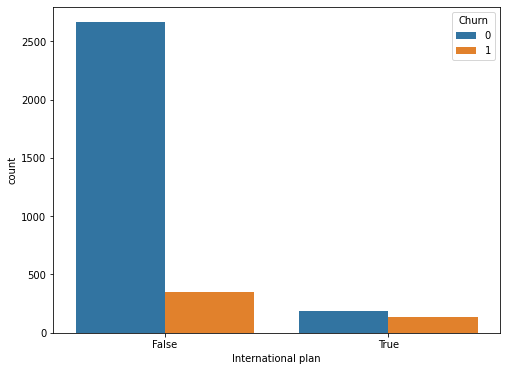

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df);
plt.savefig('int_plan_and_churn.png', dpi=300);

Бачимо, що коли роумінг підключено, частка відтоку набагато вища – цікаве спостереження! можливо великі і погано контрольовані витрати в роумінгу дуже конфліктогенні і призводять до невдоволеності клієнтів телеком-оператора і, відповідно, до їх відтоку. 

Далі подивимося на ще одну важливу ознаку – *"Число звернень в сервісний центр"* (`Customer service calls`). Також побудуємо зведену таблицю і картинку.


In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


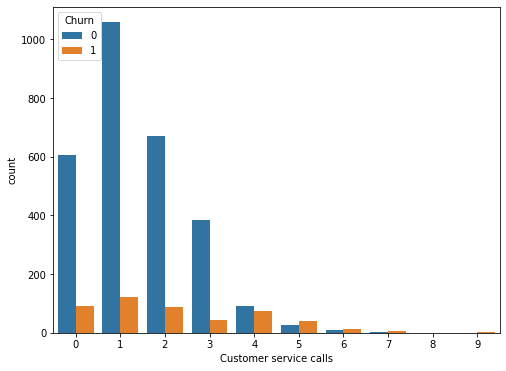

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.savefig('serv_calls__and_churn.png', dpi=300);

Можливо, за зведеною таблицею це не так добре видно (або нудно повзти поглядом по рядкам з цифрами), а ось картинка красномовно свідчить про те, що частка відтоку сильно зростає починаючи з 4 звінків в сервісний центр. 

Додамо тепер в наш DataFrame бінарну ознаку — результат порівняння `Customer service calls > 3`. І ще раз подивимося, як він пов'язаний з відтоком. 

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


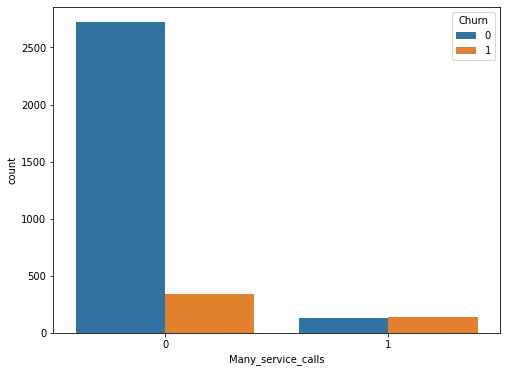

In [ ]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);
plt.savefig('many_serv_calls__and_churn.png', dpi=300);

Об'єднаємо розглянуті вище умови і побудуємо зведену таблицю для цього об'єднання і віддтоку.

In [ ]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , 
            df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Тобто, прогнозуючи відтік клієнта у випадку, коли число дзвінків в сервісний центр більше 3 і підключено роумінг (і прогнозуючи лояльність – в протилежному випадку), можна очікувати біля 85.8% правильних потраплянь (помиляємося лише  464 + 9 разів). Ці 85.8%, які ми отримали за допомогою дуже простих суджень – це непогана відправна точка (*baseline*) для подальших моделей машинного навчання, які ми будемо будувати. 

В цілому до появи машинного навчання процес аналізу даних виглядав приблизно так. Підсумуємо:
    
- Частка лояльних клієнтів у вибірці – 85.5%. Найбільш наївна модель, відповідь якої "Клієнт завжди лояльний" на подібних даних буде вгадувати приблизно в  85.5% випадків. Тобто є частка неправильних відповідей (*accuracy*) наступних моделей повинна бути як мінімум не меньша, а краще, значно вища за цю цифру;
- За допомогою простого прогнозу, який умовно можна виразити такою формулою: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можна очікувати частку вгадування 85.8%, що дещо више 85.5%;
- Ці два бейзлайни ми отримали без будь-якого машинного навчання, і вони виконують роль відправної точки для наших наступних моделей. Якщо виявиться, що ми великими зусиллями збільшуємо частку правильних відповідей всього лише на   0.5%, то можливо, ми щось робимо не так, і достатньо обмежитися простою моделлю з двох умов; 
- Перед навчанням складних моделей рекомендується дещо повертіти даними і перевірити прості припущення. Більш того, в бізнес-додатках машинного навчання частіше починають саме з простих рішень, а потім експериментують з їх ускладненням. 